## SYSTEM RECOMMENDATION - Proyek 2
* Nama : Febby Ariyanti Herdiana

## Importing Library

In [2]:
import pandas as pd
import numpy as np
import zipfile
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from zipfile import ZipFile
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"febbyariyanti01","key":"9e5a11195940e22660ae4231b2006d1f"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 71% 17.0M/23.8M [00:00<00:00, 59.4MB/s]
100% 23.8M/23.8M [00:00<00:00, 72.5MB/s]


## Ekstrak Data

In [7]:
local_zip = '/content/book-recommendation-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Data Loading

In [8]:
books = pd.read_csv('/content/Books.csv')
ratings = pd.read_csv('/content/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [10]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [11]:
# melihat ukuran data
print(books.shape)
print(ratings.shape)

(271360, 8)
(1149780, 3)


Berdasarkan data di atas dataset ini berisi :

* Data books terdapat 271360 baris dan 8 kolom variabel
* Data ratings terdapat 1149780 baris dan 3 kolom variabel

## Exploratory Data Analysis (EDA)

# Deskripsi Variabel

Books.csv:

* ISBN : Nomor Buku Standar Internasional (International Standard Book Number)
* Book-Title : Judul buku
* Book-Author : Penulis buku
* Year-Of-Publication : Tahun buku diterbitkan
* Publisher : Penerbit buku
* Image-URL-S : URL sampul buku berukuran kecil
* Image-URL-M : URL gambar sampul buku berukuran sedang
* Image-URL-L : URL gambar sampul buku berukuran besar

Ratings.csv:

* User-ID : ID/kode unik bagi pengguna
* ISBN : Nomor Buku Standar Internasional (International Standard Book Number)
* Book-Rating : Rating buku dari user

In [12]:
print('Jumlah data buku: ', len(books['ISBN'].unique()))
print('Jumlah data user yang memberikan rating: ', len(ratings['User-ID'].unique()))
print('Jumlah data rating pada buku: ', len(ratings['ISBN'].unique()))

Jumlah data buku:  271360
Jumlah data user yang memberikan rating:  105283
Jumlah data rating pada buku:  340556


## Univariate Data Analysis

In [13]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Berdasarkan data di atas, dataframe books memiliki 271360 data entri dan terdapat 8 variabel yang semua bertipe data object.

Mengecek berapa banyak data entri yang unik dari masing-masing variabel dan merename kolom header.

In [14]:
books = books.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author',
                              'Year-Of-Publication':'year_of_publication','Image-URL-S':'Image_URL_S',
                              'Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})
books.head(4)

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [15]:
book_list = books['book_title'].value_counts().keys()
jumlah = books['book_title'].value_counts()

book_count = pd.DataFrame({'book_title': book_list, 'Jumlah': jumlah}).reset_index(drop=True)
book_count

,book_title,Jumlah
0,Selected Poems,27
1,Little Women,24
2,Wuthering Heights,21
3,The Secret Garden,20
4,Dracula,20
...,...,...
242130,What Every Kid Should Know,1
242131,The Seventh Enemy (A Brady Coyne Mystery),1
242132,A Brace of Skeet,1
242133,"The Yellow Admiral (O'Brian, Patrick, Aubrey/M...",1


In [16]:
# mengecek entri unik dr variabel Book-Title
print('Banyak Data : ', len(books.book_title.unique()))
print('Judul Buku : ', books.book_title.unique())

Banyak Data :  242135
Judul Buku :  ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]


In [17]:
author_list = books['book_author'].value_counts().keys()
jumlah = books['book_author'].value_counts()

author_count = pd.DataFrame({'book_author': author_list, 'Jumlah': jumlah}).reset_index(drop=True)
author_count

,book_author,Jumlah
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373
...,...,...
102018,Linda Jackson,1
102019,Artiste C. Arthur,1
102020,Emily Pearl Kingsley,1
102021,Jean Cassels,1


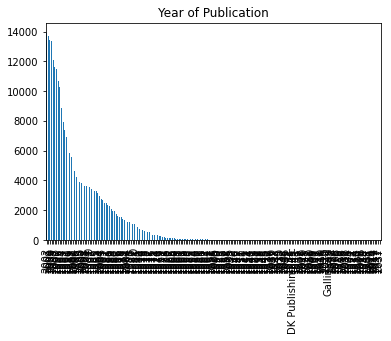

In [18]:
# melihat distribusi data variabel Year of Publication
import matplotlib.pyplot as plt
count = books["year_of_publication"].value_counts()
count.plot(kind='bar', title="Year of Publication");
 
plt.show()

Dari grafik gambar di atas terlihat bahwa distribusi data Year of Publication cenderung berjenis right-skewed.

In [21]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [19]:
rating_list = ratings['Book-Rating'].value_counts().keys()
jumlah = ratings['Book-Rating'].value_counts()

rating_count = pd.DataFrame({'Ratings': rating_list, 'Jumlah': jumlah}).reset_index(drop=True)
rating_count

,Ratings,Jumlah
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


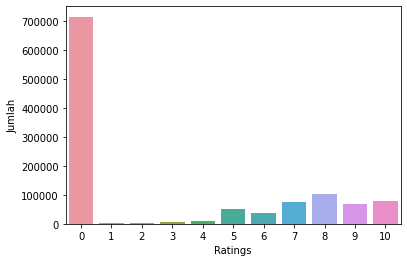

In [20]:
sns.barplot(data=rating_count, x='Ratings', y='Jumlah')
plt.show()

Dari visualisasi di atas, diketahui bahwa nilai maksimum rating adalah 10 dan nilai minimumnya adalah 0. Artinya, skala rating berkisar antara 0 hingga 10.

## Data Pre-Processing

Penggabungan Data Buku dan Data Rating

In [21]:
# Menggabungkan dataframe books dengan ratings dan memasukkannya ke dalam variabel ds
db = pd.merge(books, ratings, on='ISBN', how='left')
db

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1032340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0
1032341,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0


Karena jumlah data di atas mencapai 1032345 maka data hanya akan diambil menjadi 100000 sample data.

In [22]:
db = db[:100000]
db

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,159033.0,0.0
99996,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,159854.0,10.0
99997,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,160368.0,0.0
99998,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,160819.0,0.0


## Data Preparation

### Memeriksa dan Menangani Missing Value

In [23]:
# mengecek missing value pada dataframe
db.isnull().sum()

ISBN                   0
book_title             0
book_author            0
year_of_publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
User-ID                4
Book-Rating            4
dtype: int64

In [24]:
# membersihkan missing value dengan fungsi dropna()
db_clean = db.dropna()
db_clean

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,159033.0,0.0
99996,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,159854.0,10.0
99997,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,160368.0,0.0
99998,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,http://images.amazon.com/images/P/0385484518.0...,160819.0,0.0


In [25]:
# Mengecek kembali missing value pada variabel ds_clean
db_clean.isnull().sum()

ISBN                   0
book_title             0
book_author            0
year_of_publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
User-ID                0
Book-Rating            0
dtype: int64

#### Memeriksa dan Menangani Duplikasi Data

In [26]:
for col in books.columns:
  print(f'{col}: {books[col].duplicated().sum()}')

ISBN: 0
book_title: 29225
book_author: 169336
year_of_publication: 271158
Publisher: 254552
Image_URL_S: 316
Image_URL_M: 316
Image_URL_L: 318


In [27]:
# Membuat variabel preparation yang berisi dataframe ds_clean kemudian mengurutkan berdasarkan book_title
preparation = db_clean
preparation.sort_values('book_title')

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User-ID,Book-Rating
36394,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,88122.0,0.0
36401,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,230522.0,0.0
36400,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,221777.0,10.0
36399,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,198711.0,0.0
36398,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,http://images.amazon.com/images/P/0307001164.0...,193584.0,0.0
...,...,...,...,...,...,...,...,...,...,...
45605,0060934719,stardust,Neil Gaiman,2001,Perennial,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,142524.0,9.0
45604,0060934719,stardust,Neil Gaiman,2001,Perennial,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,141309.0,7.0
45603,0060934719,stardust,Neil Gaiman,2001,Perennial,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,141200.0,0.0
45625,0060934719,stardust,Neil Gaiman,2001,Perennial,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,http://images.amazon.com/images/P/0060934719.0...,236754.0,10.0


In [28]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('book_title')
preparation

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
15,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8.0,0.0
18,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8.0,0.0
29,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99739,0375726624,Newjack: Guarding Sing Sing (Vintage),Ted Conover,2001,Vintage Books USA,http://images.amazon.com/images/P/0375726624.0...,http://images.amazon.com/images/P/0375726624.0...,http://images.amazon.com/images/P/0375726624.0...,1888.0,8.0
99743,0892882816,"Homestead, A Memoir",Jane Kirkpatrick,2000,Maverick Publications,http://images.amazon.com/images/P/0892882816.0...,http://images.amazon.com/images/P/0892882816.0...,http://images.amazon.com/images/P/0892882816.0...,1891.0,5.0
99745,1577487370,The Quilt of Life: A Patchwork of Devotional T...,Mary Tatem,2000,Barbour Publishing,http://images.amazon.com/images/P/1577487370.0...,http://images.amazon.com/images/P/1577487370.0...,http://images.amazon.com/images/P/1577487370.0...,1891.0,7.0
99749,1578562325,"All Together in One Place: A Novel of Kinship,...",Jane Kirkpatrick,2000,Waterbrook Press,http://images.amazon.com/images/P/1578562325.0...,http://images.amazon.com/images/P/1578562325.0...,http://images.amazon.com/images/P/1578562325.0...,1891.0,0.0


### Mengubah Dataframe menjadi List

In [29]:
book_ISBN = preparation['ISBN'].tolist()
title = preparation['book_title'].tolist()
author = preparation['book_author'].tolist()
book_year_of_publication = preparation['year_of_publication'].tolist()
book_publisher = preparation['Publisher'].tolist()

print(len(book_ISBN))
print(len(title))
print(len(author))
print(len(book_year_of_publication))
print(len(book_publisher))

2228
2228
2228
2228
2228


Membuat dictionary untuk menentukan pasangan key-value

In [30]:
db_new = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'title': title,
    'author': author,
    'book_year_of_publication': book_year_of_publication,
    'book_publisher': book_publisher
})
db_new

,book_ISBN,title,author,book_year_of_publication,book_publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
2223,0375726624,Newjack: Guarding Sing Sing (Vintage),Ted Conover,2001,Vintage Books USA
2224,0892882816,"Homestead, A Memoir",Jane Kirkpatrick,2000,Maverick Publications
2225,1577487370,The Quilt of Life: A Patchwork of Devotional T...,Mary Tatem,2000,Barbour Publishing
2226,1578562325,"All Together in One Place: A Novel of Kinship,...",Jane Kirkpatrick,2000,Waterbrook Press


## Model Content Based Filtering

Pengembangan model menggunakan pendekatan Content-Based Filtering ini dilakukan untuk menghasilkan rekomendasi buku berdasarkan nama penulis buku yang pernah dibaca oleh pengguna (user).

In [31]:
data = db_new
data.sample(4)

,book_ISBN,title,author,book_year_of_publication,book_publisher
792,0747549923,Last Exit to Brooklyn,Hubert Selby,2000,Bloomsbury Pub Ltd
2137,0553255142,Man from the Broken Hills,Louis L'Amour,1975,Bantam Books
2200,1929194196,Sun Tzu's The Art of War Plus The Original Chi...,Sun Tzu,2003,Clearbridge Publishing
580,0945586051,The Doctor the Patient: The Personal Journey o...,Allen Widome,1989,Editech Pr


## TF-IDF Vectorizer

* Pada pemodelan dengan Content-Based Filtering ini, teknik TF-IDF Vectorizer akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap nama penulis buku (author).

* TF-IDF atau Term Frequency-Inverse Document Frequency berfungsi untuk mengukur seberapa penting suatu kata terhadap kata-kata lain yang ada dalam dokumen.

Pada kode berikut kita akan mengambil kata-kata penting dari variabel author untuk mendapatkan rekomendasi berdasarkan nama penulis.

In [32]:
tfid = TfidfVectorizer()
tfid.fit(data['author']) 

tfid.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aarsen',
 'abraham',
 'abrahams',
 'ackerman',
 'ad',
 'adam',
 'adamo',
 'adams',
 'adele',
 'adeline',
 'adler',
 'adrian',
 'adriana',
 'agatha',
 'agut',
 'akiba',
 'al',
 'alain',
 'alan',
 'albanese',
 'albert',
 'albom',
 'alcorn',
 'alcott',
 'aldous',
 'aldrin',
 'aleksandr',
 'aleramo',
 'alessandra',
 'alessandro',
 'alex',
 'alexander',
 'alexandra',
 'alexandre',
 'alfie',
 'alfred',
 'alice',
 'alisa',
 'allan',
 'allen',
 'allende',
 'allison',
 'alpers',
 'alter',
 'amanda',
 'american',
 'amis',
 'amit',
 'amour',
 'amp',
 'amy',
 'anatoli',
 'andahazi',
 'anderson',
 'andrea',
 'andrei',
 'andrew',
 'andrews',
 'andy',
 'angela',
 'angelou',
 'anita',
 'ann',
 'anna',
 'anne',
 'annegrit',
 'annette',
 'annie',
 'anonimo',
 'ansay',
 'anshaw',
 'anthony',
 'antoine',
 'antoni',
 'antonio',
 'applegate',
 'arabella',
 'archer',
 'ardagh',
 'arens',
 'arensen',
 'ariella',
 'arlene',
 'arman',
 'armistead',
 'armstrong',
 'arnel',
 'arnette',
 'arnold',
 'arthur',
 'a

In [33]:
tfidf_matrix = tfid.fit_transform(data['author']) 
tfidf_matrix.shape

(2228, 2089)

In [60]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [62]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (2228, 2228)


title,OLD MAN AND THE SEA,Angels &amp; Insects : Two Novellas,Eeyore's Little Book of Gloom,Starfire (Bantam Spectra),On the Road (Essential.penguin S.)
title,,,,,
Now You See Her,0.0,0.0,0.0,0.0,0.0
"The Subtle Knife (His Dark Materials, Book 2)",0.0,0.0,0.0,0.0,0.0
A Little Honesty: Trials and Triumphs of a Prince of Balona,0.0,0.0,0.0,0.0,0.0
The Red Tent (Bestselling Backlist),0.0,0.0,0.0,0.0,0.0
Proof,0.0,0.0,0.0,0.0,0.0
One Heart,0.0,0.0,0.0,0.0,0.0
Spring Break,0.0,0.0,0.0,0.0,0.0
Clifford's Sports Day,0.0,0.0,0.0,0.0,0.0
Die Klone der Joanna May. Roman.,0.0,0.0,0.0,0.0,0.0


## Mendapatkan Rekomendasi Buku

In [63]:
def author_recommendations(title, similarity_data=cosine_sim_df, items=data[['title', 'author']], k=5):
  index = similarity_data.loc[:, title].to_numpy().argpartition(range(-1, -k, -1))
  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(title, errors='ignore')
  return pd.DataFrame(closest).merge(items).head(k)

In [64]:
data.sample(5)

,book_ISBN,title,author,book_year_of_publication,book_publisher
756,0679603352,The Cider House Rules: A Novel (Modern Library),John Irving,1999,Modern Library
1560,0425157539,Sudden Prey,John Sandford,1997,Berkley Publishing Group
319,0312963009,Neanderthal: A Novel,John Darnton,1997,St. Martin's Press
2156,0373630468,Worse Than a Crime,Anne Burton,1982,Harlequin
2171,0192860925,The Selfish Gene,Richard Dawkins,1990,Oxford University Press


In [65]:
# mengecek berdasarkan judul buku
data[data.title.eq('Sudden Prey')]

,book_ISBN,title,author,book_year_of_publication,book_publisher
1560,0425157539,Sudden Prey,John Sandford,1997,Berkley Publishing Group


In [66]:
# Mendapatkan rekomendasi judul buku berdasarkan nama penulis (author) dari buku yang berjudul Deception Point
author_recommendations('Sudden Prey')

,title,author
0,The Night Crew,John Sandford
1,Chosen Prey,John Sandford
2,The Testament,John Grisham
3,The Last Juror,John Grisham
4,The Street Lawyer,JOHN GRISHAM


## Model Collaborative Filtering

Tidak seperti pada teknik Content-Based Filtering. Data yang digunakan di teknik Collaborative Filtering kali ini tidak memerlukan data Book-Author, dan Num-Ratings. Sebab pada teknik ini hanya menggunakan rating sebagai acuan sistem rekomendasi.

In [67]:
# read dataset
df = ratings
df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


### Data Preparation

### Menyandikan Fitur

Pada tahap ini, kita perlu melakukan persiapan data untuk menyandikan (encode) fitur 'user_id' dan 'ISBN' ke dalam indeks integer. Berikut penerapannya.

In [68]:
user_ids = df['User-ID'].unique().tolist()
user2encoded = {x: i for i, x in enumerate(user_ids)}
encoded2user = {i: x for i, x in enumerate(user_ids)}

In [69]:
book_isbns = df['ISBN'].unique().tolist()
book2encoded = {x: i for i, x in enumerate(book_isbns)}
encoded2book = {i: x for i, x in enumerate(book_isbns)}

In [70]:
df['User-Encoded'] = df['User-ID'].map(user2encoded)
df['Book-Encoded'] = df['ISBN'].map(book2encoded)

In [71]:
num_users = len(user2encoded)
print(num_users)
 
num_books = len(encoded2book)
print(num_books)

df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)
 
min_rating = min(df['Book-Rating'])
max_rating = max(df['Book-Rating'])

print(f'Number of User: {num_users}, Number of Books: {num_books}, Min Rating: {min_rating}, Max Rating: {max_rating}')

105283
340556
Number of User: 105283, Number of Books: 340556, Min Rating: 0.0, Max Rating: 10.0


In [72]:
df

,User-ID,ISBN,Book-Rating,User-Encoded,Book-Encoded
0,276725,034545104X,0.0,0,0
1,276726,0155061224,5.0,1,1
2,276727,0446520802,0.0,2,2
3,276729,052165615X,3.0,3,3
4,276729,0521795028,6.0,3,4
...,...,...,...,...,...
1149775,276704,1563526298,9.0,105278,226347
1149776,276706,0679447156,0.0,105279,7295
1149777,276709,0515107662,10.0,105280,12065
1149778,276721,0590442449,10.0,105281,78598


## Normalisasi Data Rating

Melakukan transformasi pada data fitur Book-Rating. MinMaxScaler mentransformasikan fitur dengan menskalakan setiap fitur ke rentang tertentu. Library ini menskalakan dan mentransformasikan setiap fitur secara individual sehingga berada dalam rentang yang diberikan pada set pelatihan, pada library ini memiliki range default antara nol dan satu.

In [73]:
x = df[['User-Encoded', 'Book-Encoded']].values
y = df['Book-Rating'].values
y = y.reshape(-1, 1)

In [74]:
scaler = MinMaxScaler()
norm_y = scaler.fit_transform(y)
norm_y = norm_y.reshape(1, -1)[0]

## Split Dataset

In [75]:
x_train, x_val, y_train, y_val = train_test_split(x, norm_y, test_size=0.1, random_state=123)

In [76]:
def create_dataset(x, y, batch_size, buffer_size=None, shuffle=True):
  ds = tf.data.Dataset.from_tensor_slices((x, y))

  if shuffle:
    ds = ds.shuffle(buffer_size)

  ds = ds.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)

  return ds

In [77]:
batch_size = 128
buffer_size = len(x)

train_ds = create_dataset(x_train, y_train, batch_size, buffer_size)
val_ds = create_dataset(x_val, y_val, batch_size, shuffle=False)

## Modelling

In [78]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)

    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-3),
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.books_embedding = layers.Embedding(
        num_books,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-3),
    )
    self.books_bias = layers.Embedding(num_books, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    books_vector = self.books_embedding(inputs[:, 1])
    books_bias = self.books_bias(inputs[:, 1])

    dot_user_books = tf.tensordot(user_vector, books_vector, 2)

    x = dot_user_books + user_bias + books_bias

    return tf.nn.sigmoid(x)

In [79]:
embedding_size = 32

model = RecommenderNet(num_users, num_books, embedding_size)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## Model Training

In [80]:
history = model.fit(
  train_ds,
  epochs = 20,
  validation_data = val_ds,
  verbose=1,
)

Epoch 1/20
8085/8085 [==============================] - 89s 10ms/step - loss: 0.6086 - root_mean_squared_error: 0.3818 - val_loss: 0.5419 - val_root_mean_squared_error: 0.3557
Epoch 2/20
8085/8085 [==============================] - 82s 10ms/step - loss: 0.5186 - root_mean_squared_error: 0.3422 - val_loss: 0.5167 - val_root_mean_squared_error: 0.3428
Epoch 3/20
8085/8085 [==============================] - 84s 10ms/step - loss: 0.4959 - root_mean_squared_error: 0.3295 - val_loss: 0.5087 - val_root_mean_squared_error: 0.3387
Epoch 4/20
8085/8085 [==============================] - 81s 10ms/step - loss: 0.4833 - root_mean_squared_error: 0.3222 - val_loss: 0.5053 - val_root_mean_squared_error: 0.3370
Epoch 5/20
8085/8085 [==============================] - 79s 10ms/step - loss: 0.4743 - root_mean_squared_error: 0.3169 - val_loss: 0.5040 - val_root_mean_squared_error: 0.3364
Epoch 6/20
8085/8085 [==============================] - 79s 10ms/step - loss: 0.4672 - root_mean_squared_error: 0.3126 -

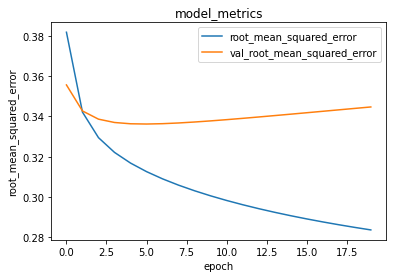

In [81]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['root_mean_squared_error', 'val_root_mean_squared_error'])
plt.show()

## Mendapatkan Rekomendasi Buku

In [98]:
book_df = db_new
df = pd.read_csv('/content/Ratings.csv')

# rename header kolom
df = df.rename(columns={'User-ID': 'user_id','Book-Rating':'book_rating'})
#ratings.head()
 
# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
book_read_by_user = df[df.user_id == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_never_read = book_df[~book_df['book_ISBN'].isin(book_read_by_user.ISBN.values)]['book_ISBN'] 
book_never_read = list(
    set(book_never_read)
    .intersection(set(book2encoded.keys()))
)
 
book_never_read = [[book2encoded.get(x)] for x in book_never_read]
user_encoder = user2encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_never_read), book_never_read)
)

In [102]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    encoded2book.get(book_never_read[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'book_rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['book_ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.author)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['book_ISBN'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.title, ':', row.author)

70/70 [==============================] - 0s 2ms/step
Showing recommendations for users: 105718
Book with high ratings from user
--------------------------------
--------------------------------
Top 10 book recommendation
--------------------------------
I Spy Spooky Night: A Book of Picture Riddles (I Spy Books) : Walter Wick
Les Fleurs Du Mal : C. Baudelaire
Sunwing (Aladdin Fantasy) : Kenneth Oppel
One Fish Two Fish Red Fish Blue Fish (I Can Read It All by Myself Beginner Books) : DR SEUSS
Where the Sidewalk Ends : Poems and Drawings : Shel Silverstein
The Power of Myth (Illustrated Edition) : Joseph Campbell
Fg on Our Immigrant Ance : J Smith
CHILD IS BORN, A : LENNART NILSSON
Ender's Shadow : Orson Scott Card
Yeats Is Dead! (Vintage Crime/Black Lizard) : Joseph O'Connor


## Evaluation

1. Content Based Filtering

Untuk evaluasi model dengan pendekatan ini akan menggunakan metrik precision. Berikut adalah formulanya :

Precision = #of recommendation that are relevant / #of item we recommend 

Metrik precision akan menghitung jumlah item rekomendasi yang relevan dari keseluruhan rekomendasi. Relevansi ditentukan dengan banyaknya jumlah rekomendasi yang sesuai/mirip (similar) dengan preferensi pengguna (dalam hal ini sesuai dengan nama penulis buku yang pernah dibaca oleh pengguna).

Melihat dari hasil rekomendasi yang diberikan, sistem telah memberikan rekomendasi buku berdasarkan kata kunci nama penulis (author) dari buku yang pernah dibaca oleh pengguna (user). Dalam hal ini terdapat 2 buku yang relevan dengan preferensi pengguna, maka :

Precision = 2/5
Precision = 40%

Hal ini dapat diartikan bahwa sistem rekomendasi yang dibuat memiliki presisi 40% dan sudah bisa memberikan rekomendasi sesuai dengan tujuan dari pengembangan sistem, yakni untuk menghasilkan rekomendasi buku berdasarkan nama penulis buku yang pernah dibaca oleh pengguna (user).

2. Collaborative Filtering

Dari hasil plot metrik, dapat diartikan bahwa :

Proses training model untuk data train cukup smooth walaupun pada epoch awal nilai error sempat naik, tapi kemudian menurun secara signifikan hingga nilai error akhir sebesar 0.2837.
Sedangkan pada data validasi, nilai error tidak menurun secara signifikan, dan error akhirnya sebesar 0.5234.
Walaupun nilai error yang didapat cukup baik untuk sistem rekomendasi, namun model ini masih underfitting.

## References

[1] Romadhon, A. C. (2020). Pentingnya Membaca Dan Menulis Serta Kaitannya Dengan Kemajuan Peradaban Bangsa.

[2] Ilham, Bahrul U. (2022). Harbuknas 2022: Literasi Indonesia Peringkat Ke-62 Dari 70 Negara. Retrieved [16 Oktober 2022] from : [Link](https://bisniskumkm.com/harbuknas-2022-literasi-indonesia-peringkat-ke-62-dari-70-negara/#:~:text=Harbuknas%202022%20%3A%20Literasi%20Indonesia%20Peringkat%20Ke%2D62%20Dari%2070%20negara,-UNESCO%20Menyebut%20indeks)

[3] Book Recommendation Dataset (https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset) : Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

[4] Rhys, Hefin. "Machine Learning with R, the Tidyverse, and MLR". Manning Publications. 2020. Page 286. Tersedia: [O'Reilly Media](https://learning.oreilly.com/library/view/machine-learning-with/9781617296574/).